In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import linear_model

from sklearn.datasets import load_digits 

In [2]:
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

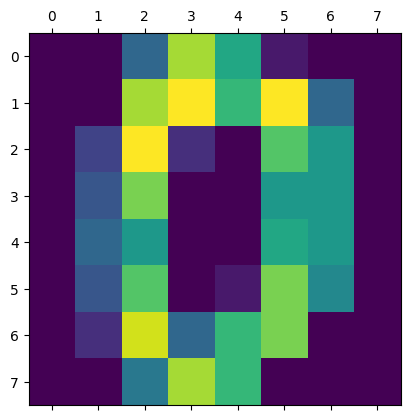

In [8]:
plt.matshow(digits.images[0])

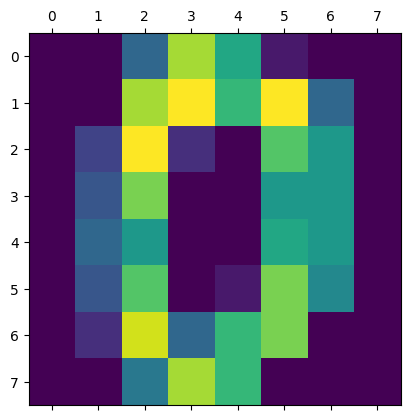

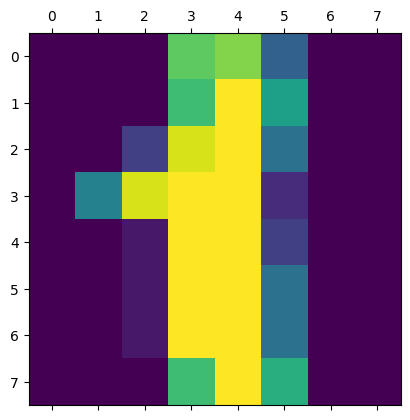

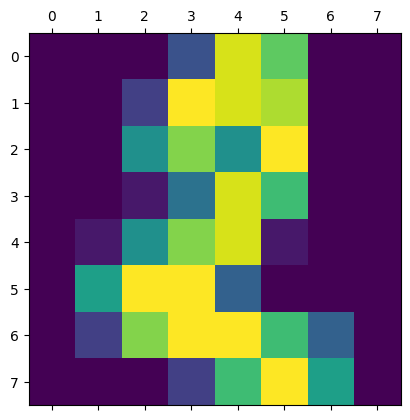

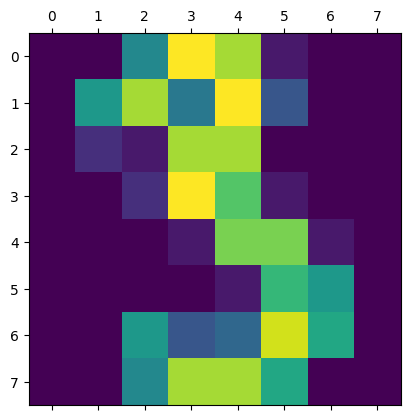

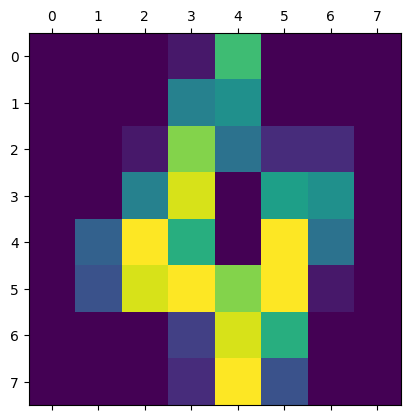

In [7]:

for i in range(5):
    plt.matshow(digits.images[i])

In [10]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=10)

In [13]:
len(X_train)

1437

In [14]:
len(X_test)

360

In [31]:
#normalize X_test, X_train for better accuracy

X_train, X_test = X_train/np.max(X_train), X_test/np.max(X_test)

In [32]:
## Max iteration is set to a high value so that the model converges

model = linear_model.LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [33]:
model.score(X_test, y_test)

0.9638888888888889

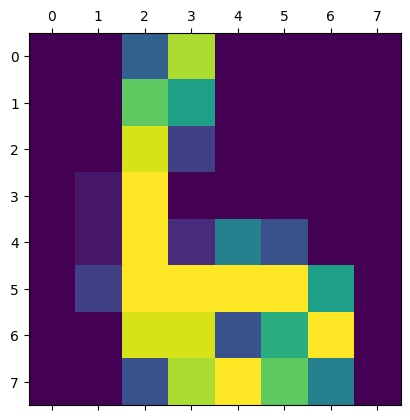

In [23]:
plt.matshow(digits.images[67])

In [25]:
digits.target[67]

6

In [24]:
model.predict([digits.data[67]])

array([6])

In [26]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [27]:
##Confusion Matrix

from sklearn.metrics import confusion_matrix

y_predicted = model.predict(X_test)

cm = confusion_matrix(y_test, y_predicted)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  1,  0,  1,  0,  0,  0,  1,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 38,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 32,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0, 30,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 38,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  1,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  2, 36]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

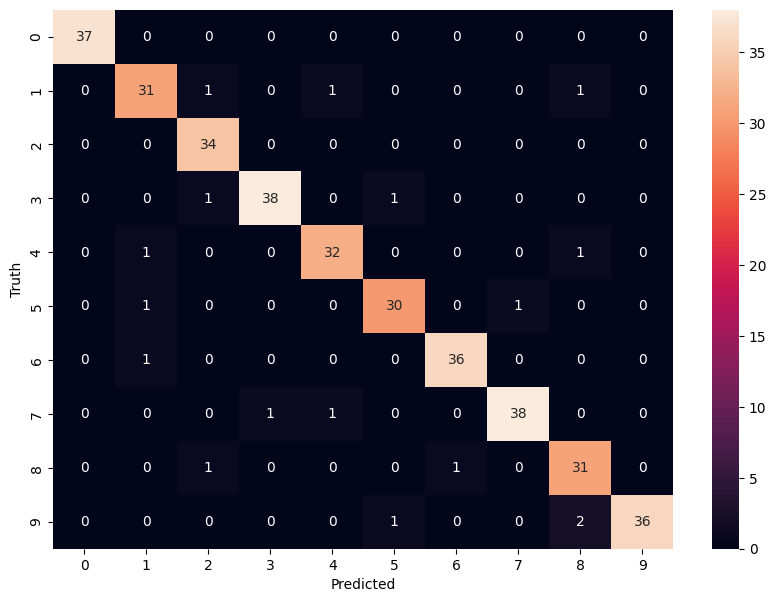

In [30]:
## Plotting the confusion matrix

import seaborn as sn 

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot= True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
